# Working environmment

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from joblib import dump, load
import dashboard
import plotly.express as px
import plotly.graph_objs as go

# Options
pd.set_option('display.max_columns', 200)
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Testing visualisations

## Data loading

In [17]:
# Load data
thres = 0.3
df_decision = dashboard.load_decisions(thres)
df_cust = dashboard.load_customer_data()
df_shap = dashboard.load_shap_values()

In [3]:
# Decisions
df_decision.head()

SK_ID_CURR    TARGET  LOAN                                option
0      100001  0.026279  True  {'label': '100001', 'value': 100001}
1      100005  0.179404  True  {'label': '100005', 'value': 100005}
2      100013  0.018879  True  {'label': '100013', 'value': 100013}
3      100028  0.034658  True  {'label': '100028', 'value': 100028}
4      100038  0.130465  True  {'label': '100038', 'value': 100038}

In [4]:
# Shapley values
df_shap.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                                                                   
100001               -0.000393     0.081718     -0.000613        -0.000035   
100005               -0.000252    -0.231303     -0.002194         0.000051   
100013               -0.001311    -0.169916      0.001468        -0.000567   
100028               -0.000771     0.063379     -0.000764        -0.000002   
100038               -0.001736    -0.096122      0.001653         0.000327   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100001         -0.000165          0.002019   -0.022824     0.058683   
100005         -0.000021          0.001852    0.044123     0.065913   
100013          0.000757         -0.000162   -0.014812    -0.080259   
100028          0.000018         -0.001871   -0.003831    -0.095390   
100038         -0.000159         -0.003563   -0.026965    -0.093840   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                                                          
100001                       -0.014931    0.027302      -0.001626   
100005                        0.015039   -0.034843       0.102534   
100013                       -0.028257    0.028033       0.099868   
100028                       -0.038406   -0.023242      -0.041892   
100038                        0.009321   -0.052140      -0.009164   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
SK_ID_CURR                                                                
100001              -0.002293        -0.022385    -0.039325         0.0   
100005               0.031044        -0.033596    -0.078349         0.0   
100013              -0.004239        -0.008920     0.111435         0.0   
100028               0.001157        -0.005130    -0.033514         0.0   
100038              -0.005537         0.058783     0.029300         0.0   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100001        2.765189e-06         0.011410          0.000009   -0.002792   
100005        5.832116e-07         0.017323          0.000001   -0.003288   
100013        5.774060e-07         0.014257          0.000002   -0.002784   
100028        5.832116e-07         0.009169          0.000001    0.009263   
100038        5.605549e-07        -0.070362          0.000002   -0.002309   

            FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR                                                      
100001        0.000184         0.000136              0.009901   
100005       -0.000011         0.000132              0.004170   
100013       -0.000015         0.000098              0.013990   
100028       -0.000045         0.001288              0.010565   
100038        0.000010        -0.001664              0.010966   

            HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                        
100001                     0.020037                5.340897e-06   
100005                    -0.001820               -8.114755e-07   
100013                    -0.002508               -1.687522e-06   
100028                    -0.005064               -1.744476e-05   
100038                     0.003831               -4.717721e-06   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100001                        0.000007                     0.001772   
100005                       -0.000028                     0.000003   
100013                        0.000011                    -0.000075   
100028                       -0.000033                    -0.000016   
100038                       -0.000049                    -0.0000

In [5]:
# Customers data
df_cust.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
SK_ID_CURR                                                                   
100001                       0            0         False             True   
100005                       0            1         False             True   
100013                       0            1          True             True   
100028                       0            0         False             True   
100038                       0            1          True            False   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100001                 0          135000.0    568800.0      20560.5   
100005                 0           99000.0    222768.0      17370.0   
100013                 0          202500.0    663264.0      69777.0   
100028                 2          315000.0   1575000.0      49018.5   
100038                 1          180000.0    625500.0      32067.0   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                                                          
100001                        0.018850      -19241        -2329.0   
100005                        0.035792      -18064        -4469.0   
100013                        0.019101      -20038        -4458.0   
100028                        0.026392      -13976        -1866.0   
100038                        0.010032      -13040        -2191.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
SK_ID_CURR                                                                
100001                -5170.0             -812          NaN           1   
100005                -9118.0            -1623          NaN           1   
100013                -2175.0            -3503          5.0           1   
100028                -2000.0            -4208          NaN           1   
100038                -4000.0            -4262         16.0           1   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100001                   1                0                 1           0   
100005                   1                0                 1           0   
100013                   1                0                 1           0   
100028                   1                0                 1           1   
100038                   1                1                 1           0   

            FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR                                                      
100001               1              2.0                     2   
100005               0              2.0                     2   
100013               0              2.0                     2   
100028               0              4.0                     2   
100038               0              3.0                     2   

            HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                        
100001                           18                           0   
100005                            9                           0   
100013                           14                           0   
100028                           11                           0   
100038                            5                           0   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100001                               0                            0   
100005                               0                            0   
100013                               0                            0   
100028                               0                            0   
100038                               0                           

## Test on histograms

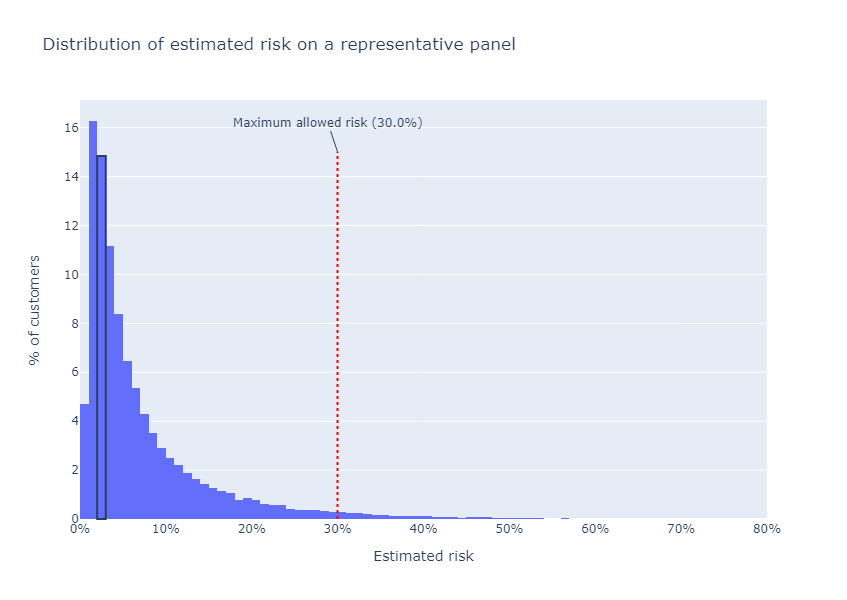

In [6]:
# Histogram
customer_id=100001
cust_target = df_decision[df_decision['SK_ID_CURR']==customer_id]['TARGET'].values[0]
heights = np.histogram(df_decision['TARGET'], bins=np.arange(0,1,0.01))[0]
heights = heights/heights.sum()
cust_height = 100*heights[int(cust_target//0.01)]

fig = px.histogram(df_decision, x='TARGET', nbins=100, histnorm='percent',
                  title='Distribution of estimated risk on a representative panel',
                  labels={'TARGET':'Estimated risk'})

fig.update_layout(yaxis_title='% of customers', xaxis_tickformat = ',.0%')

fig.add_shape(type='line', x0=thres, x1=thres, y0=0, y1=15, line_color='red', line_dash='dot')
fig.add_annotation(text='Maximum allowed risk ({:.1%})'.format(thres), x=thres, y=15)

fig.add_shape(type='rect',x0=cust_target//0.01/100, 
              x1=cust_target//0.01/100 + 0.01, 
              y0=0, y1=cust_height)

fig.show()

## Waterfall tests

In [7]:
# Data for waterfall
s_ = df_shap.iloc[24819,1:]
df_ = pd.DataFrame(s_)
df_.columns = ['values']
df_['abs']=df_['values'].apply('abs')
df_.sort_values(by='abs', inplace=True)
df_1 = df_.iloc[-20:]
df_2 = pd.DataFrame(df_.iloc[:-20].sum(axis=0)).T
df_2.index=['others']

df_1

values       abs
BURO_DAYS_CREDIT_MEAN                -0.051464  0.051464
PREV_APP_CREDIT_PERC_MEAN            -0.051900  0.051900
NEW_SCORES_STD                       -0.055908  0.055908
POS_NAME_CONTRACT_STATUS_Active_MEAN -0.058785  0.058785
BURO_AMT_CREDIT_SUM_DEBT_MEAN         0.059992  0.059992
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN     -0.061535  0.061535
DAYS_BIRTH                            0.062216  0.062216
PREV_NAME_YIELD_GROUP_high_MEAN      -0.064314  0.064314
INSTAL_AMT_INSTALMENT_SUM            -0.065858  0.065858
NEW_SOURCES_PROD                     -0.069710  0.069710
NEW_ANNUITY_TO_INCOME_RATIO          -0.080822  0.080822
EXT_SOURCE_1                         -0.085716  0.085716
NEW_CREDIT_TO_GOODS_RATIO             0.095821  0.095821
INSTAL_DPD_MEAN                      -0.103878  0.103878
DAYS_EMPLOYED                        -0.113019  0.113019
APPROVED_CNT_PAYMENT_MEAN            -0.117855  0.117855
NEW_CREDIT_TO_ANNUITY_RATIO          -0.128415  0.128415
AMT_ANNUITY                          -0.140928  0.140928
EXT_SOURCE_2                          0.191256  0.191256
EXT_SOURCE_3                         -0.682075  0.682075

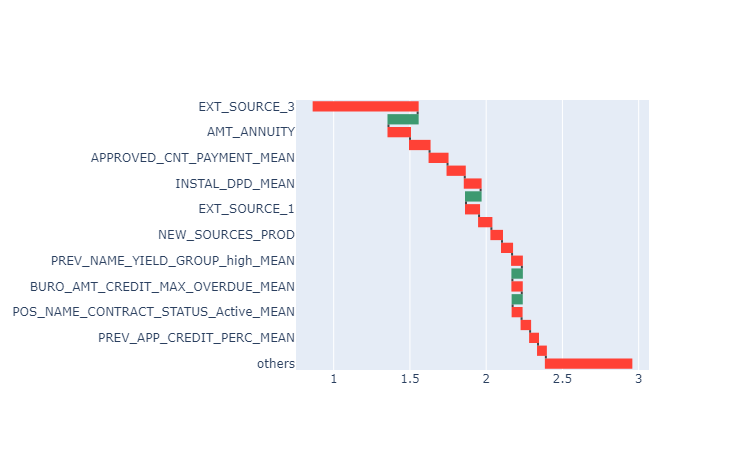

In [8]:
# Waterfall
fig = go.Figure(go.Waterfall(
    base = 2.952,
    orientation = 'h',
    y=df_2.append(df_1).index,
    x=df_2.append(df_1)['values']
))
fig

## Tables tests

In [20]:
df_cust.loc[customer_id]

NAME_CONTRACT_TYPE                        0
CODE_GENDER                               0
FLAG_OWN_CAR                          False
FLAG_OWN_REALTY                        True
CNT_CHILDREN                              0
                                      ...  
CC_NAME_CONTRACT_STATUS_Signed_VAR      NaN
CC_NAME_CONTRACT_STATUS_nan_MAX         NaN
CC_NAME_CONTRACT_STATUS_nan_MEAN        NaN
CC_NAME_CONTRACT_STATUS_nan_SUM         NaN
CC_NAME_CONTRACT_STATUS_nan_VAR         NaN
Name: 100001, Length: 378, dtype: object

In [65]:
customer_id = 100013

df_1 = df_shap.loc[[customer_id]].T
df_1.columns=['shap values']
df_1['abs']=df_1['shap values'].apply('abs')
df_1.sort_values(by='abs', ascending=False, inplace=True)

df_2 = df_cust.loc[[customer_id]].T
df_2.columns=['customer values']

df_table = df_1.merge(df_2, left_index=True, right_index=True)
df_table_c = df_table[['customer values', 'shap values']].head(15)
df_table_c

customer values  shap values
EXT_SOURCE_2                               0.699787     0.292680
NEW_CREDIT_TO_ANNUITY_RATIO                 9.50548     0.227609
EXT_SOURCE_3                               0.610991     0.186698
CODE_GENDER                                       1    -0.169916
OWN_CAR_AGE                                       5     0.111435
NEW_CREDIT_TO_GOODS_RATIO                    1.0528     0.105634
DAYS_EMPLOYED                                 -4458     0.099868
INSTAL_DPD_MEAN                            0.541935    -0.088451
AMT_REQ_CREDIT_BUREAU_QRT                         1     0.088032
INSTAL_AMT_INSTALMENT_SUM               1.68917e+06     0.081580
AMT_ANNUITY                                   69777    -0.080259
APPROVED_CNT_PAYMENT_MEAN                   17.3333    -0.077809
NAME_EDUCATION_TYPE_Highereducation               1     0.071987
INSTAL_PAYMENT_DIFF_MEAN                    1157.66    -0.069350
NEW_CAR_TO_EMPLOY_RATIO                 -0.00112158     0.064973

In [58]:
overall_top = df_shap.apply('abs').mean().sort_values(ascending=False).head(15)
df_overall = df_table.loc[overall_top.index]
df_overall['mean abs impact'] = overall_top
df_overall['criteria'] = df_overall.index
df_overall = df_overall.applymap(lambda x: round(x,3) if pd.api.types.is_number(x) else x)
df_overall[['mean abs impact', 'customer values', 'shap values']]

mean abs impact  customer values  shap values
EXT_SOURCE_2                           0.261            0.700        0.293
EXT_SOURCE_3                           0.253            0.611        0.187
NEW_CREDIT_TO_ANNUITY_RATIO            0.124            9.505        0.228
CODE_GENDER                            0.121            1.000       -0.170
EXT_SOURCE_1                           0.112              NaN       -0.016
NEW_CREDIT_TO_GOODS_RATIO              0.100            1.053        0.106
DAYS_EMPLOYED                          0.092        -4458.000        0.100
INSTAL_DPD_MEAN                        0.088            0.542       -0.088
AMT_ANNUITY                            0.085        69777.000       -0.080
NEW_SOURCES_PROD                       0.078              NaN       -0.022
APPROVED_CNT_PAYMENT_MEAN              0.074           17.333       -0.078
INSTAL_AMT_INSTALMENT_SUM              0.064      1689174.270        0.082
NAME_FAMILY_STATUS_Married             0.055            1.000        0.048
PREV_CNT_PAYMENT_MEAN                  0.054           17.333       -0.015
OWN_CAR_AGE                            0.050            5.000        0.111

## Criteria selection

In [102]:
df_crit = pd.read_csv(
    '../data/data_inputs/HomeCredit_columns_description.csv', 
    encoding = 'cp1252', usecols=[2,3])

df_crit['options']=df_crit['Row'].apply(
    lambda x: {'label':x, 'value':x}
)
df_crit.head()

Row                                        Description  \
0          SK_ID_CURR                           ID of loan in our sample   
1              TARGET  Target variable (1 - client with payment diffi...   
2  NAME_CONTRACT_TYPE        Identification if loan is cash or revolving   
3         CODE_GENDER                               Gender of the client   
4        FLAG_OWN_CAR                      Flag if the client owns a car   

                                             options  
0     {'label': 'SK_ID_CURR', 'value': 'SK_ID_CURR'}  
1             {'label': 'TARGET', 'value': 'TARGET'}  
2  {'label': 'NAME_CONTRACT_TYPE', 'value': 'NAME...  
3   {'label': 'CODE_GENDER', 'value': 'CODE_GENDER'}  
4  {'label': 'FLAG_OWN_CAR', 'value': 'FLAG_OWN_C...

# Generate dash

In [104]:
thres = 0.3
dashboard.generate(thres=thres)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Nov/2020 12:21:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2020 12:21:31] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2020 12:21:31] "GET /_favicon.ico?v=1.17.0 HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2020 12:21:31] "GET /_dash-layout HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in

127.0.0.1 - - [16/Nov/2020 12:21:31] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in

127.0.0.1 - - [16/Nov/2020 12:21:32] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 135, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index_class_helper.pxi", line 109, in pandas._libs.index.Int64Engine._check_type
KeyError: None

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_excepti

127.0.0.1 - - [16/Nov/2020 12:21:39] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\alexa_000\Anaconda3\lib\site-packages\dash\dash.py", line 1076, in

127.0.0.1 - - [16/Nov/2020 12:21:39] "POST /_dash-update-component HTTP/1.1" 500 -
